In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
# Step 1: Mount Google Drive and Load Data
drive.mount('/content/drive', force_remount=True)

# Define file path and load data
file_path = '/content/Flood_Conditioning_Factors_1_5.csv'
data = pd.read_csv(file_path)



Mounted at /content/drive


In [14]:
import pandas as pd

# Example for CSV
Flood_Conditioning_Factors_1_5 = pd.read_csv("Flood_Conditioning_Factors_1_5.csv")

# Show the first 5 rows
print(Flood_Conditioning_Factors_1_5.head())


   class   latitude  longitude  elevation      ndvi      ndwi     slope  \
0      1  23.363244  90.952519         13  0.578539 -0.428427  2.019821   
1      1  23.132511  91.280210          9  0.605201 -0.374770  0.927410   
2      1  23.682397  90.853362          8  0.457837 -0.339784  2.744509   
3      1  23.455786  90.803284         11  0.441960 -0.259730  1.854334   
4      1  23.454663  90.916384          9  0.383747 -0.204420  3.435478   

            TWI       TPI     precip  soil  onlyDistanceWater  distToRoad  
0  23319.373600  0.925926  30.206936     4       7.158279e+07  212.585497  
1  50890.218466 -1.123457  44.780940     4       1.082133e+03    5.513004  
2  17115.267972  0.358025  23.189722     4       3.250433e+03  725.981460  
3  25384.794368  0.851852  23.985846     4       5.099767e+03   36.404104  
4  13690.164299 -1.197531  26.079723     4       1.150327e+04  118.101696  


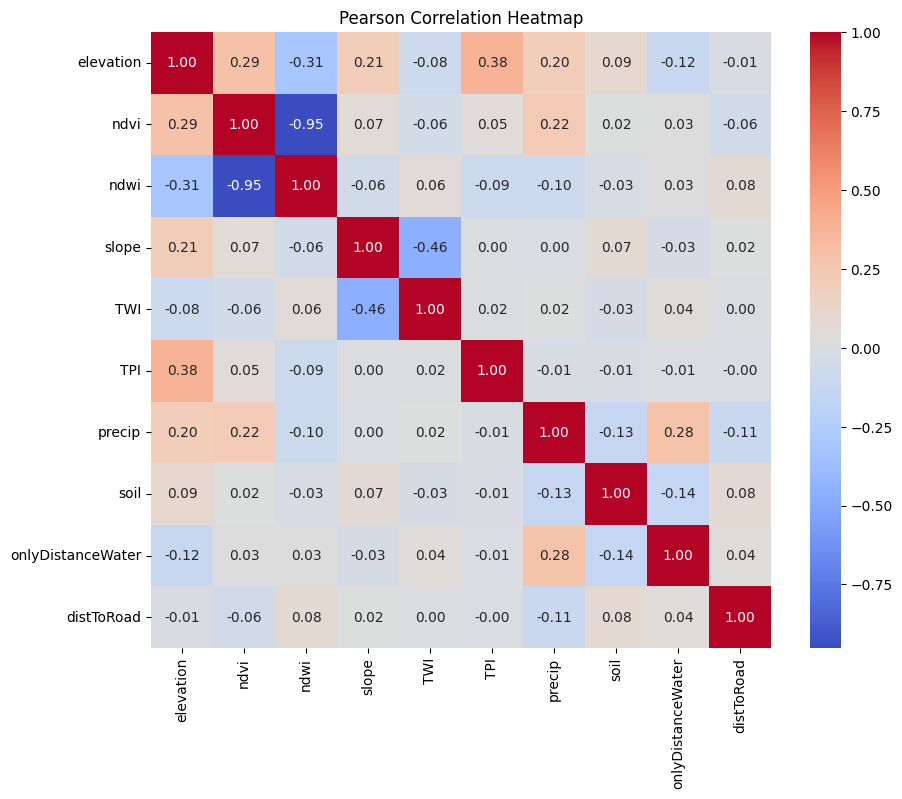

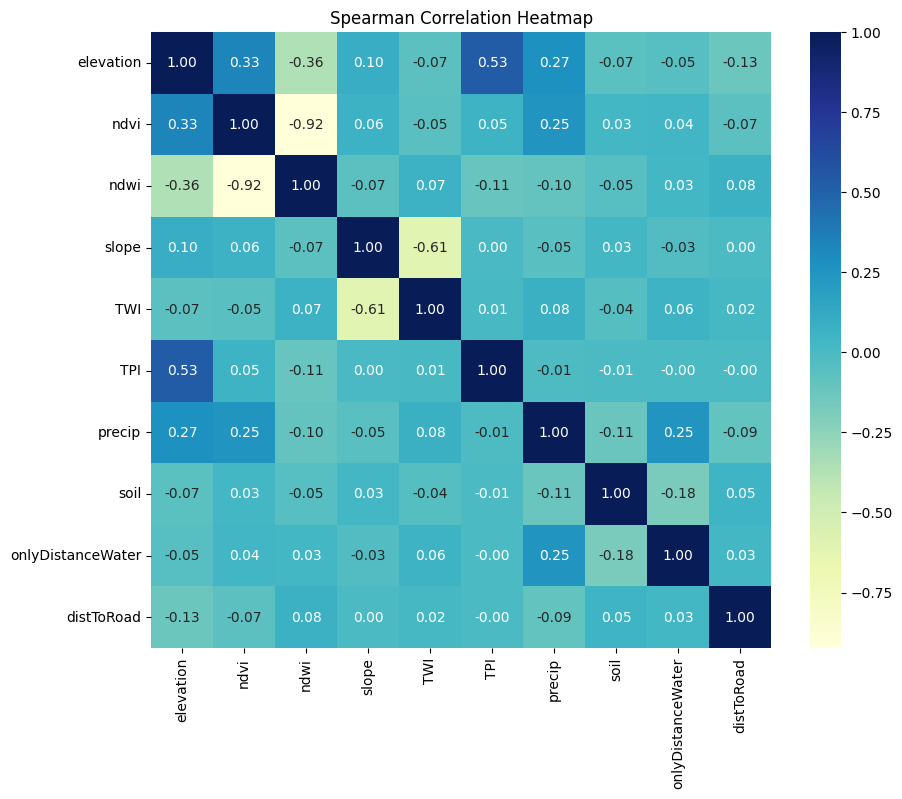

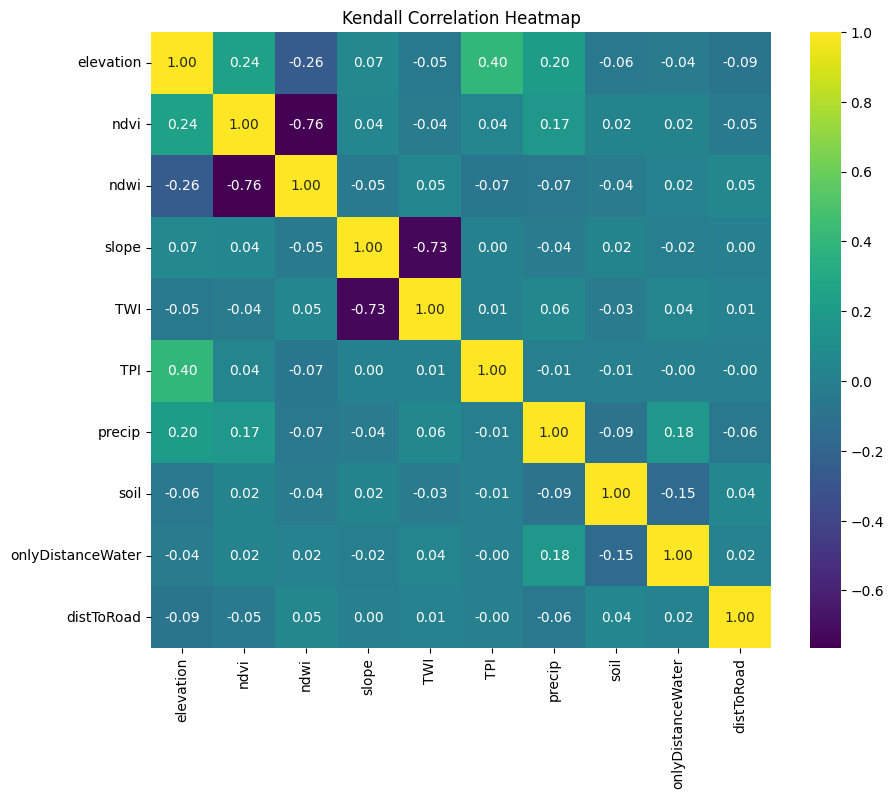

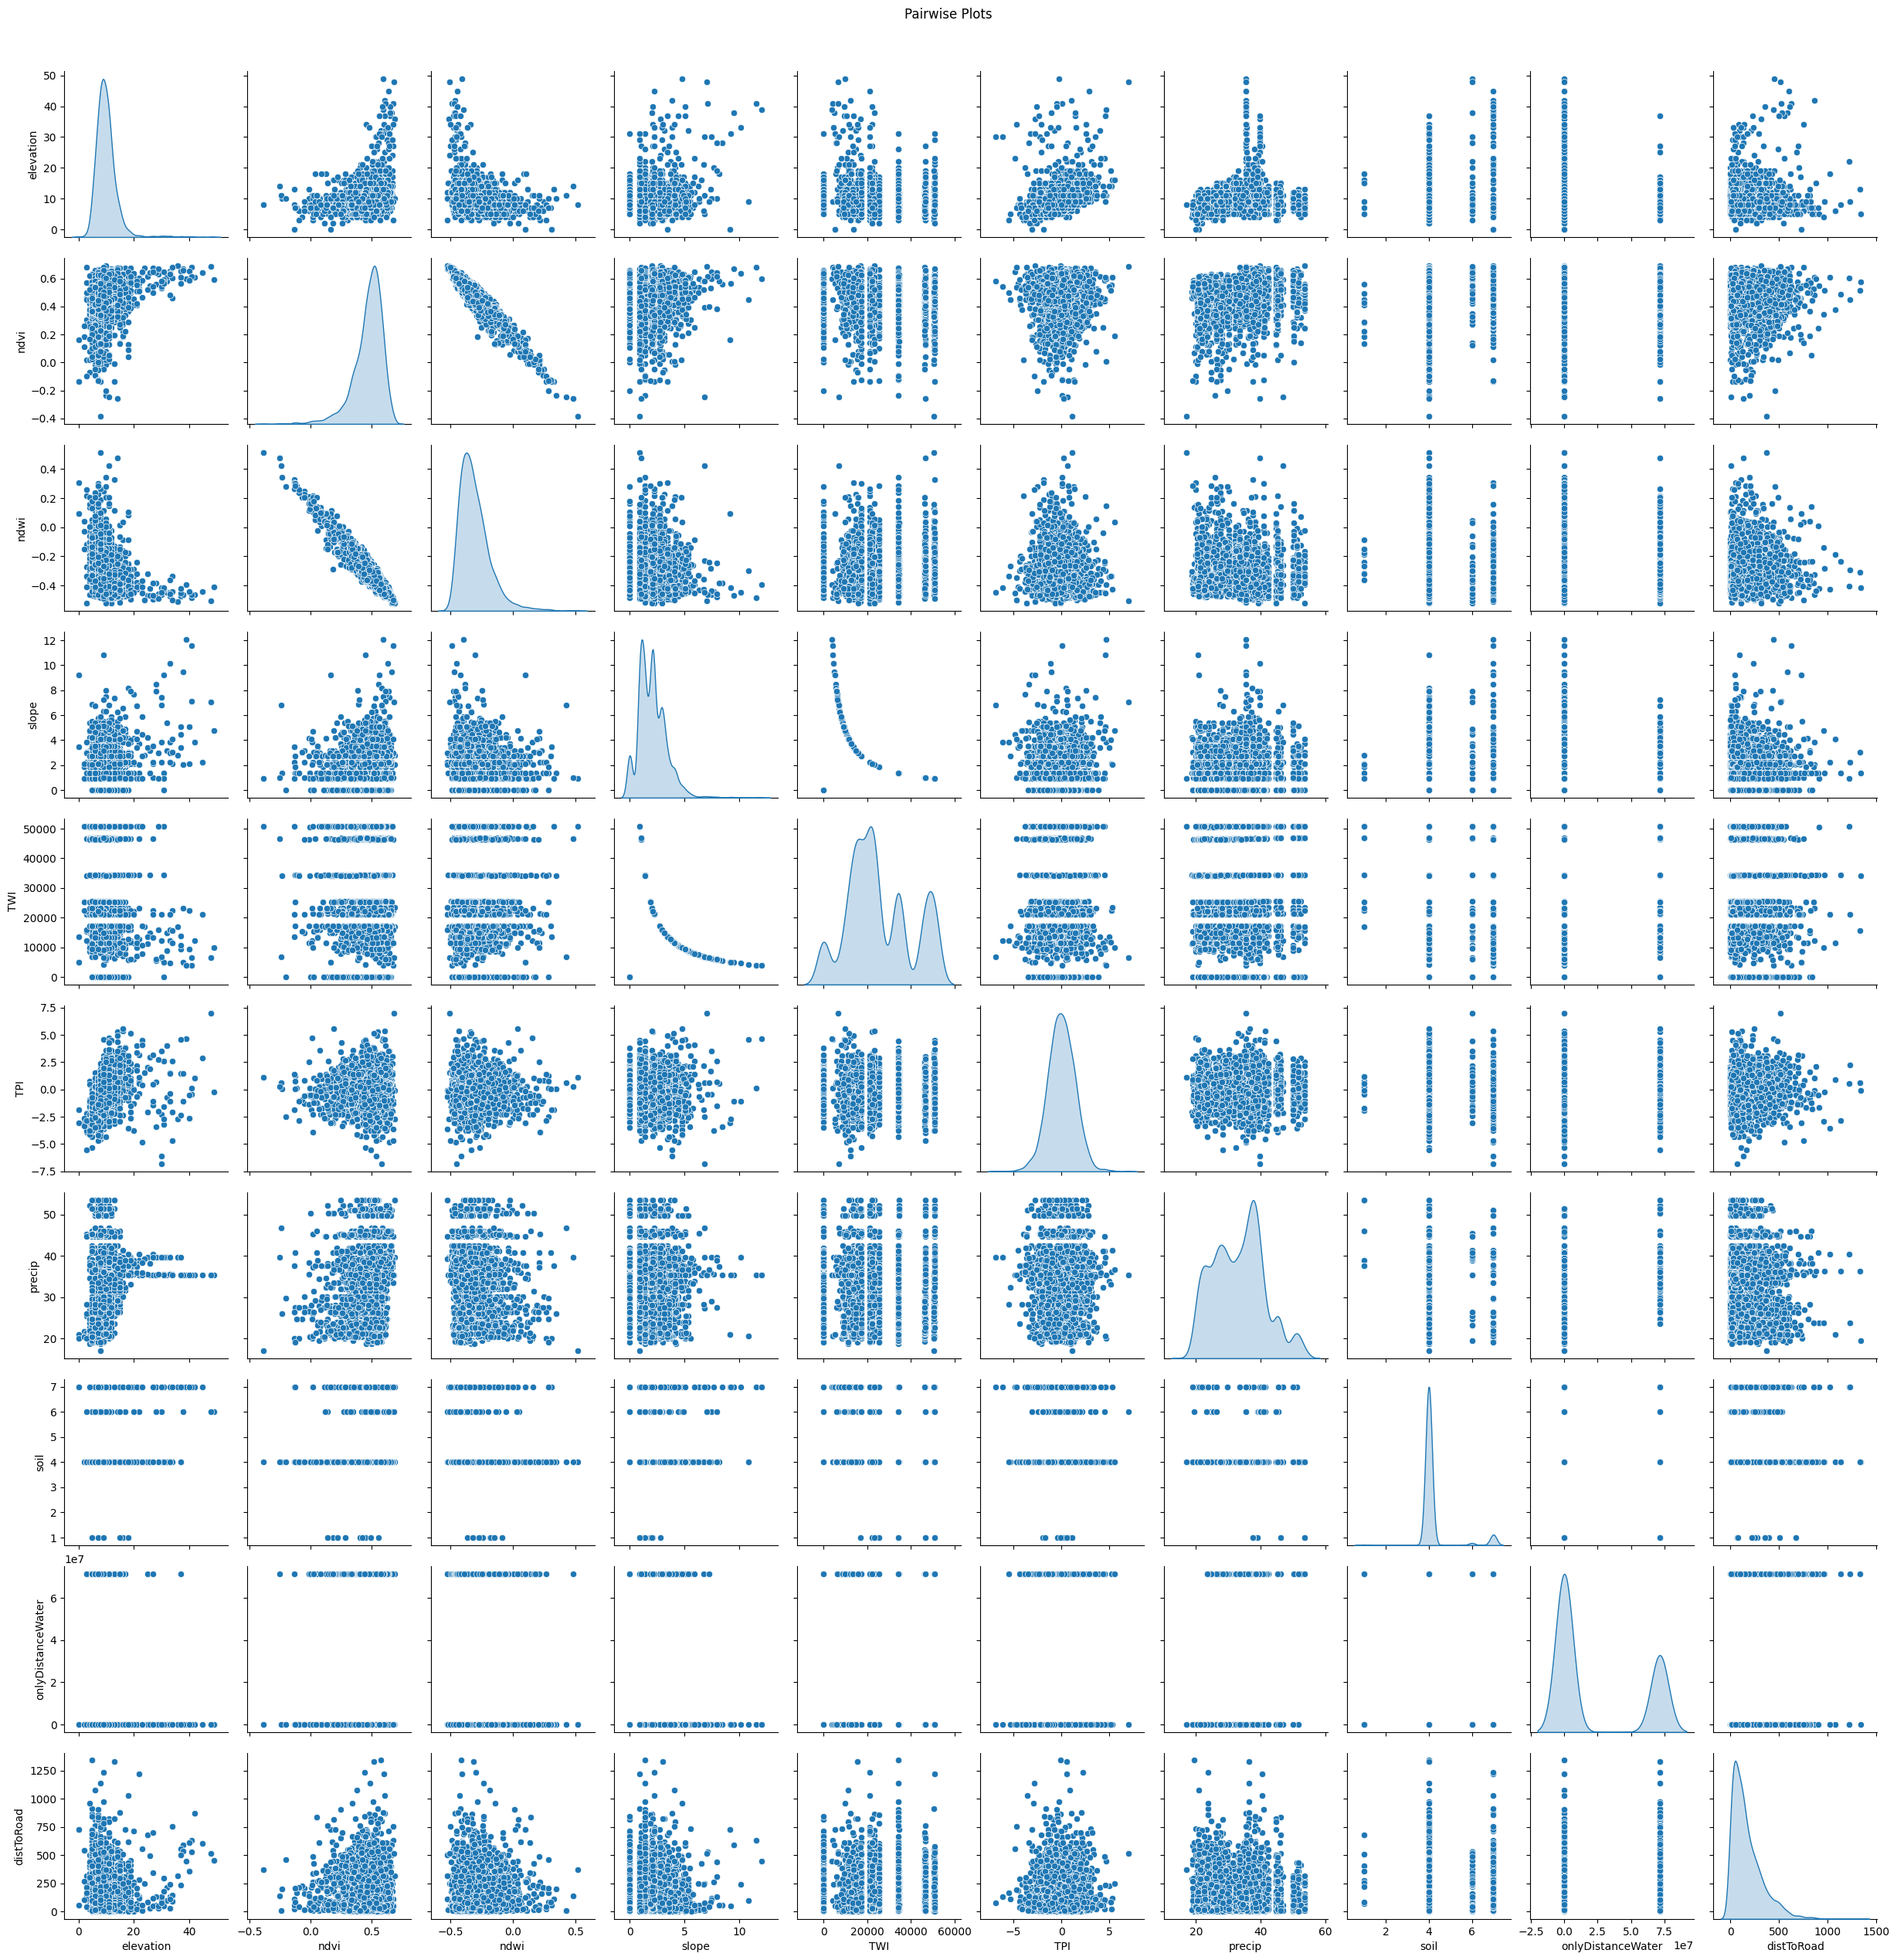


🔬 Formal Pearson Correlation Test with p-values:
elevation vs ndvi: r = 0.29, p = 0.0000 ✅ Significant
elevation vs ndwi: r = -0.31, p = 0.0000 ✅ Significant
elevation vs slope: r = 0.21, p = 0.0000 ✅ Significant
elevation vs TWI: r = -0.08, p = 0.0000 ✅ Significant
elevation vs TPI: r = 0.38, p = 0.0000 ✅ Significant
elevation vs precip: r = 0.20, p = 0.0000 ✅ Significant
elevation vs soil: r = 0.09, p = 0.0000 ✅ Significant
elevation vs onlyDistanceWater: r = -0.12, p = 0.0000 ✅ Significant
elevation vs distToRoad: r = -0.01, p = 0.4692
ndvi vs elevation: r = 0.29, p = 0.0000 ✅ Significant
ndvi vs ndwi: r = -0.95, p = 0.0000 ✅ Significant
ndvi vs slope: r = 0.07, p = 0.0002 ✅ Significant
ndvi vs TWI: r = -0.06, p = 0.0010 ✅ Significant
ndvi vs TPI: r = 0.05, p = 0.0025 ✅ Significant
ndvi vs precip: r = 0.22, p = 0.0000 ✅ Significant
ndvi vs soil: r = 0.02, p = 0.3024
ndvi vs onlyDistanceWater: r = 0.03, p = 0.1436
ndvi vs distToRoad: r = -0.06, p = 0.0005 ✅ Significant
ndwi vs eleva

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau

# Load dataset
df = pd.read_csv("Flood_Conditioning_Factors_1_5.csv")

# Select only numeric columns (excluding class if needed)
numeric_cols = df.drop(columns=['class', 'latitude', 'longitude']).columns
df_numeric = df[numeric_cols]

# 1. Correlation Matrices (Pearson, Spearman, Kendall)
corr_pearson = df_numeric.corr(method='pearson')
corr_spearman = df_numeric.corr(method='spearman')
corr_kendall = df_numeric.corr(method='kendall')

# 2. Heatmap: Pearson Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# 3. Heatmap: Spearman Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

# 4. Heatmap: Kendall Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_kendall, annot=True, cmap='viridis', fmt=".2f")
plt.title("Kendall Correlation Heatmap")
plt.show()

# 5. Optional: Pairplot to visualize bivariate relationships
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.suptitle("Pairwise Plots", y=1.02)
plt.show()

# 6. Formal significance test for correlation between each pair
print("\n🔬 Formal Pearson Correlation Test with p-values:")
for col1 in numeric_cols:
    for col2 in numeric_cols:
        if col1 != col2:
            r, p = pearsonr(df[col1], df[col2])
            if p < 0.05:
                print(f"{col1} vs {col2}: r = {r:.2f}, p = {p:.4f} ✅ Significant")
            else:
                print(f"{col1} vs {col2}: r = {r:.2f}, p = {p:.4f}")


In [4]:
# Load the dataset
data = pd.read_csv("Flood_Conditioning_Factors_1_5.csv")

# Separate features (excluding latitude and longitude) and target variable
X = data[['elevation', 'ndvi', 'slope', 'TWI', 'TPI', 'precip', 'soil',
          'onlyDistanceWater', 'distToRoad']]
y = data['class']



In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# Load the dataset
data = pd.read_csv("Flood_Conditioning_Factors_1_5.csv")

# Separate features and target variable
X = data[['elevation', 'ndvi', 'slope', 'TWI', 'TPI', 'precip', 'soil',
          'onlyDistanceWater', 'distToRoad']]
y = data['class']

# Shift target labels from [1, 2] to [0, 1]
y = y - 1

# Check unique classes
unique_classes = np.unique(y)
num_classes = len(unique_classes)
print("Unique target classes (after shift):", unique_classes)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM (samples, timesteps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Flatten for SMOTE (SMOTE only works on 2D)
X_flat = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[2])

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_flat, y)

# Reshape back to 3D for LSTM
X_resampled = X_resampled.reshape(X_resampled.shape[0], 1, X_resampled.shape[1])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Convert targets to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class weights:", class_weights_dict)

# Build Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.3),
    LSTM(64, activation='tanh'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    class_weight=class_weights_dict,
                    verbose=1)


Unique target classes (after shift): [0 1]
Class weights: {0: np.float64(1.0), 1: np.float64(1.0)}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5102 - loss: 0.6934 - val_accuracy: 0.5364 - val_loss: 0.6932
Epoch 2/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5432 - loss: 0.6888 - val_accuracy: 0.5438 - val_loss: 0.6879
Epoch 3/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5482 - loss: 0.6837 - val_accuracy: 0.5455 - val_loss: 0.6861
Epoch 4/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5720 - loss: 0.6762 - val_accuracy: 0.5472 - val_loss: 0.6805
Epoch 5/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5759 - loss: 0.6731 - val_accuracy: 0.5512 - val_loss: 0.6708
Epoch 6/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5865 - loss: 0.6618 - val_accuracy: 0.5631 - val_loss: 0.6675
Epoch 7/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5839 - loss: 0.6641 - val_accuracy: 0.5842 - val_loss: 0.6618
Epoch 8/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6002 - loss: 0.6555 - val_accuracy: 0.5904

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
True Positive (TP): 677
True Negative (TN): 794
False Positive (FP): 91
False Negative (FN): 196
Accuracy: 83.67%
Precision: 0.88
Recall (Sensitivity): 0.78
Specificity: 0.90
Kappa: 0.67
F-score: 0.83
AUC: 0.92


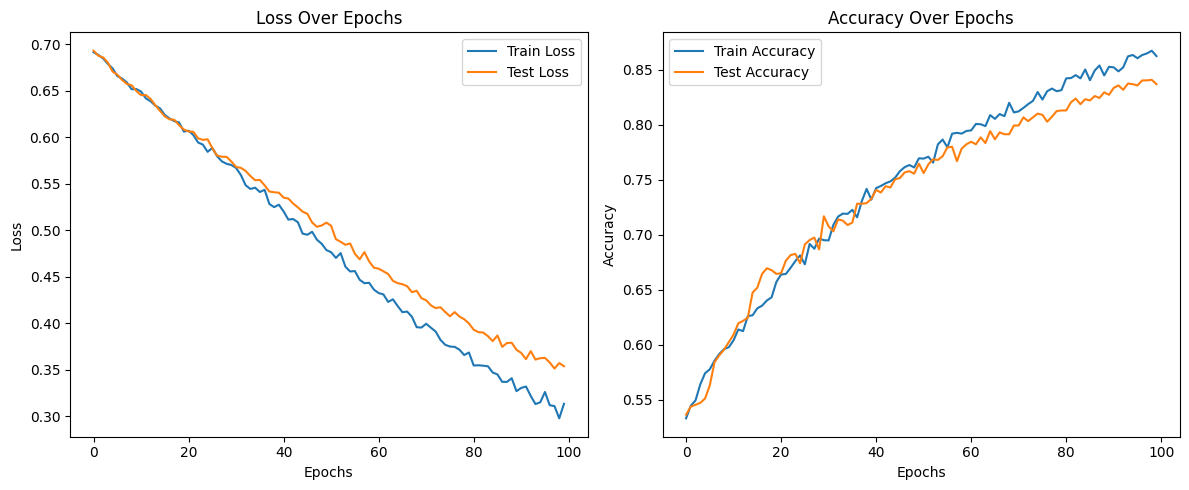

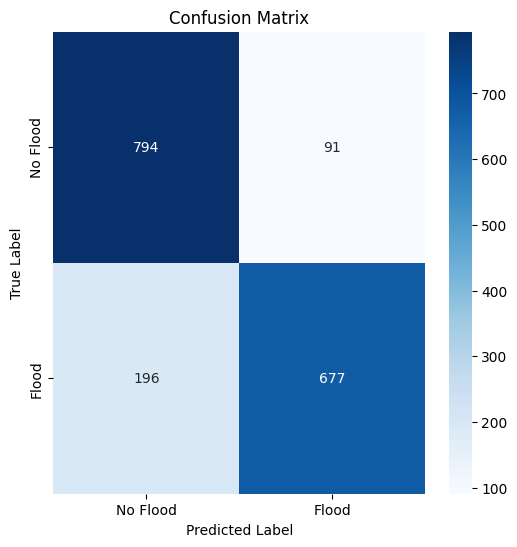

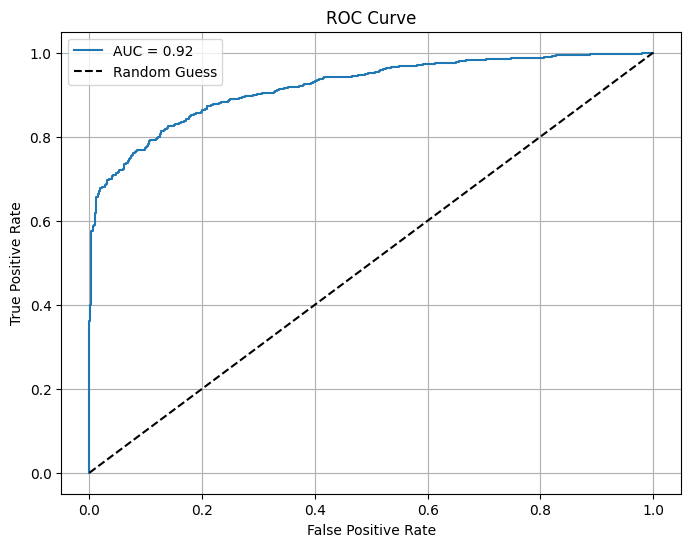

In [9]:
from sklearn.metrics import (
    confusion_matrix,
    cohen_kappa_score,
    roc_auc_score,
    roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix and metrics
cm = confusion_matrix(y_true, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
kappa = cohen_kappa_score(y_true, y_pred)

# AUC
y_test_labels = np.argmax(y_test, axis=1)
auc = roc_auc_score(y_test_labels, y_pred_prob[:, 1])

# Print metrics
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Kappa: {kappa:.2f}")
print(f"F-score: {f1_score:.2f}")
print(f"AUC: {auc:.2f}")

# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Flood', 'Flood'],
            yticklabels=['No Flood', 'Flood'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_labels, y_pred_prob[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, cohen_kappa_score, roc_auc_score

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_flat, y)

# Reshape X_resampled back to 3D for CNN (similar to LSTM input shape)
X_resampled = X_resampled.reshape(X_resampled.shape[0], X_resampled.shape[1], 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Convert target to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Build the CNN model with GlobalAveragePooling1D instead of MaxPooling1D
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    Dropout(0.3),

    GlobalAveragePooling1D(),  # Using Global Average Pooling
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    class_weight=class_weights_dict,
                    verbose=1)



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5002 - loss: 0.6948 - val_accuracy: 0.5341 - val_loss: 0.6915
Epoch 2/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5310 - loss: 0.6903 - val_accuracy: 0.5353 - val_loss: 0.6886
Epoch 3/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5261 - loss: 0.6890 - val_accuracy: 0.5427 - val_loss: 0.6869
Epoch 4/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5535 - loss: 0.6867 - val_accuracy: 0.5466 - val_loss: 0.6859
Epoch 5/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5651 - loss: 0.6833 - val_accuracy: 0.5330 - val_loss: 0.6862
Epoch 6/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5700 - loss: 0.6831 - val_accuracy: 0.5455 - val_loss: 0.6876
Epoch 7/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5597 - loss: 0.6823 - val_accuracy: 0.5580 - val_loss: 0.6829
Epoch 8/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5650 - loss: 0.6799 - val_accuracy: 0.5597

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
True Positive (TP): 594
True Negative (TN): 761
False Positive (FP): 124
False Negative (FN): 279
Accuracy: 77.08%
Precision: 0.83
Recall (Sensitivity): 0.68
Specificity: 0.86
Kappa: 0.54
F-score: 0.75
AUC: 0.85


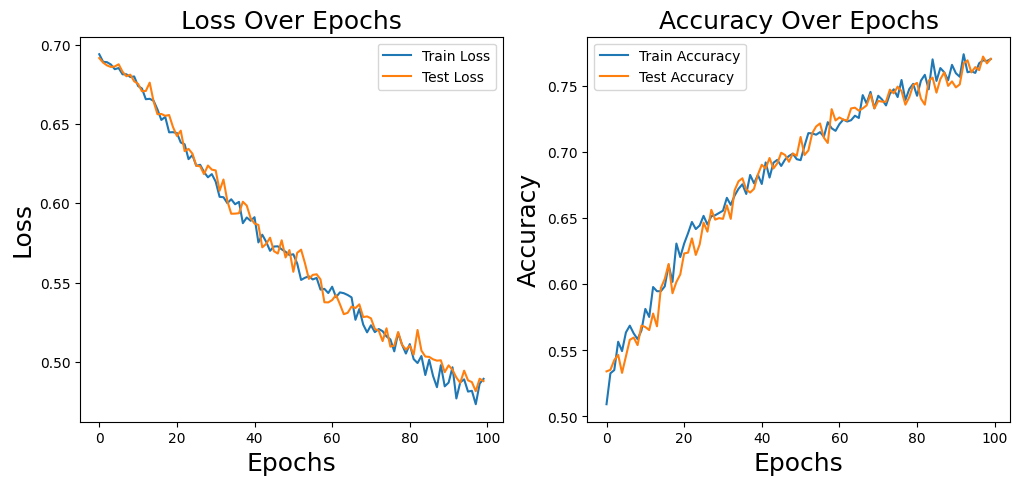

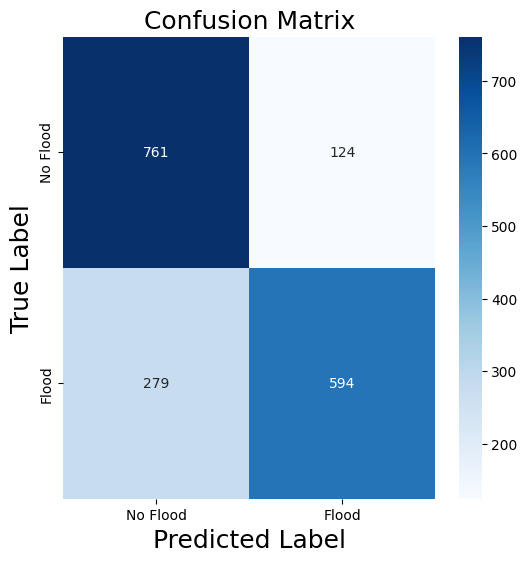

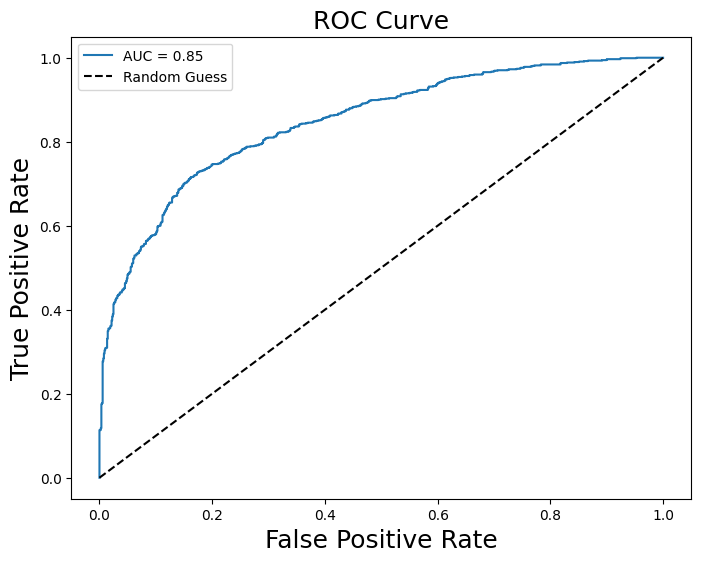

In [12]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix and metrics
cm = confusion_matrix(y_true, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
kappa = cohen_kappa_score(y_true, y_pred)

# Adjust AUC calculation by converting y_test back to 1D
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to single-label format
auc = roc_auc_score(y_test_labels, y_pred_prob[:, 1])

# Print metrics
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Kappa: {kappa:.2f}")
print(f"F-score: {f1_score:.2f}")
print(f"AUC: {auc:.2f}")

# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Over Epochs', fontsize=18)  # Set font size
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Over Epochs', fontsize=18)  # Set font size
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.legend()

plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.title('Confusion Matrix', fontsize=18)  # Set font size
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.show()

# Plot AUC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_labels, y_pred_prob[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve', fontsize=18)  # Set font size
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.legend()
plt.show()

